Hand gesture recognition system received great attention in the recent few years because of its [manifoldness](https://en.wikipedia.org/wiki/Manifold) applications and the ability to interact with machine efficiently through human-computer interaction.

### Hand Gesture Recognition Model

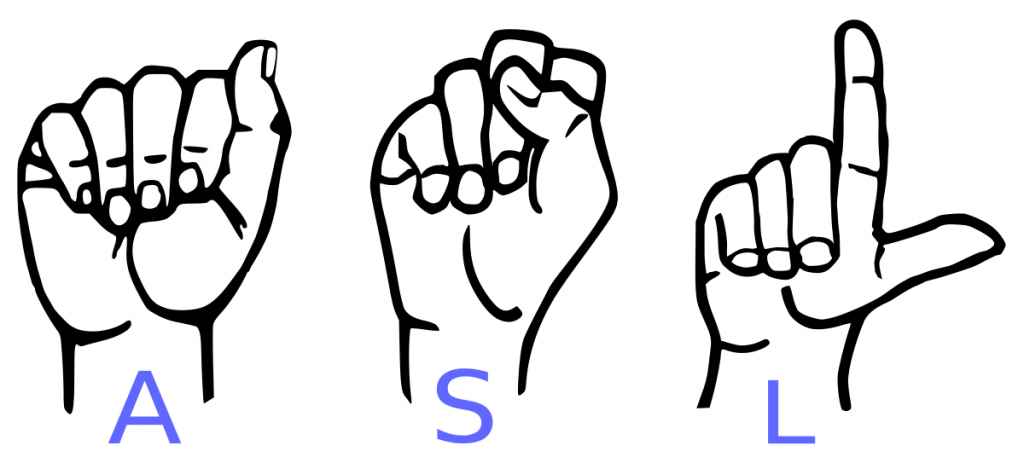

The essential objective of building a hand gesture recognition model is to create a natural interaction between human and computer where the recognized gestures can be used to control a robot or transmit meaningful information.

The gestures can be static (posture or certain pose) which require less computational complexity or dynamic (sequence of postures) which are more complex but adapted to real-time environments. 

In this file, we will train a very simple model that can be easily understood by machine learning newbies.

The hand gesture recognition system has been applied for different applications in different fields including; translation into sign language, virtual environments, intelligent monitoring, robot control, medical systems, etc.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

df0 = pd.read_csv("emg-4/0.csv", header=None )
df1 = pd.read_csv("emg-4/1.csv", header=None )
df2 = pd.read_csv("emg-4/2.csv", header=None )
df3 = pd.read_csv("emg-4/3.csv", header=None )
df = pd.concat([df0,df1,df2,df3], axis = 0)

Now we will split the data into 75% training and 25% test set:

In [2]:
x = df.loc[:,0:63]
y = df[64]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Now we will rescale the data using Standard Scalar:

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.transform(x_test))

Now we will use the Random Forest Classifier to train a Hand Gesture Recognition model:

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

lr_grid = {'max_depth' : [4,8,16,32,64,128],
           'criterion' : ['entropy','gini']}

clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)

gs = GridSearchCV(estimator = clf, param_grid=lr_grid,cv = 5)
gs.fit(x_train,y_train)
y_pred = gs.predict(x_test)
gs.best_params_

{'criterion': 'entropy', 'max_depth': 32}

Now let’s check the accuracy of the model using the confusion matrix and print the classification report of our machine learning model:

In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Classification Report: \n', classification_report(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       719
           1       0.96      0.92      0.94       769
           2       0.91      0.95      0.93       703
           3       0.89      0.86      0.87       729

    accuracy                           0.92      2920
   macro avg       0.92      0.93      0.92      2920
weighted avg       0.92      0.92      0.92      2920

Confusion Matrix: 
 [[698   0   7  14]
 [  0 709  22  38]
 [  4   7 665  27]
 [ 43  25  33 628]]
